In [1]:
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt

In [8]:
# import argparse
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,help="path to input image")
# ap.add_argument("-r", "--reference", required=True,help="path to reference OCR-A image")
# args = vars(ap.parse_args())
# args

In [2]:
ref = cv2.imread('/home/leij/Desktop/template-matching-ocr/ocr_a_reference.png')

In [4]:
ref = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

In [5]:
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

In [6]:
cv2.imshow('s',ref)
cv2.waitKey(0)

100

In [11]:
x = [i for i in range(10)]

In [12]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts = refCnts[0] if imutils.is_cv2() else refCnts[1]
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]

In [16]:
digits = {}
# loop over the OCR-A reference contours
for (i, c) in enumerate(refCnts):
	# compute the bounding box for the digit, extract it, and resize
    # it to a fixed size
    (x, y, w, h) = cv2.boundingRect(c)
    print(i,x,y,w,h)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
 
	# update the digits dictionary, mapping the digit name to the ROI
    digits[i] = roi

0 15 20 53 85
1 94 20 53 85
2 174 20 53 85
3 253 20 53 85
4 338 20 48 85
5 412 20 53 85
6 492 20 53 85
7 571 20 53 85
8 651 20 53 85
9 730 20 54 85


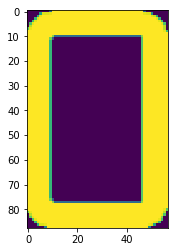

In [29]:
plt.imshow(digits[0])